In [1]:
%load_ext autoreload
%autoreload 2

import cv2
import numpy as np
import PIL
from scipy.ndimage import gaussian_filter

from pathlib import Path
import sys
sys.path.append(str(Path(__session__).parent.parent))

In [76]:
from utils import *
from detect import *

LOOKUP_RADIUS_FACTOR = .5

In [3]:
db = SalamandraDB(load_images=True)

In [4]:
salamandra0 = db.content['0']
salamandra1 = db.content['1']

In [30]:
dist = mask_distance_transform(salamandra0.body.detection.mask)
ridge = ridge_from_distance(dist)
scale = np.quantile(dist, .98)

In [31]:
deep = dist * (dist >= scale)
deep_ridge = ridge_from_distance(deep)

In [62]:
r = .5 * scale
c = mask_barycenter(deep_ridge)
p0 = mask_nearest_pixel(deep_ridge, c)
p1 = mask_farthest_pixel(deep_ridge, p0, r)

In [77]:
a = angle_to_x_axis(p0, p1)
a0, a1 = angle_range(reverse_angle(a), 45)
p2 = mask_farthest_pixel(deep_ridge, p0, r, a0, a1)

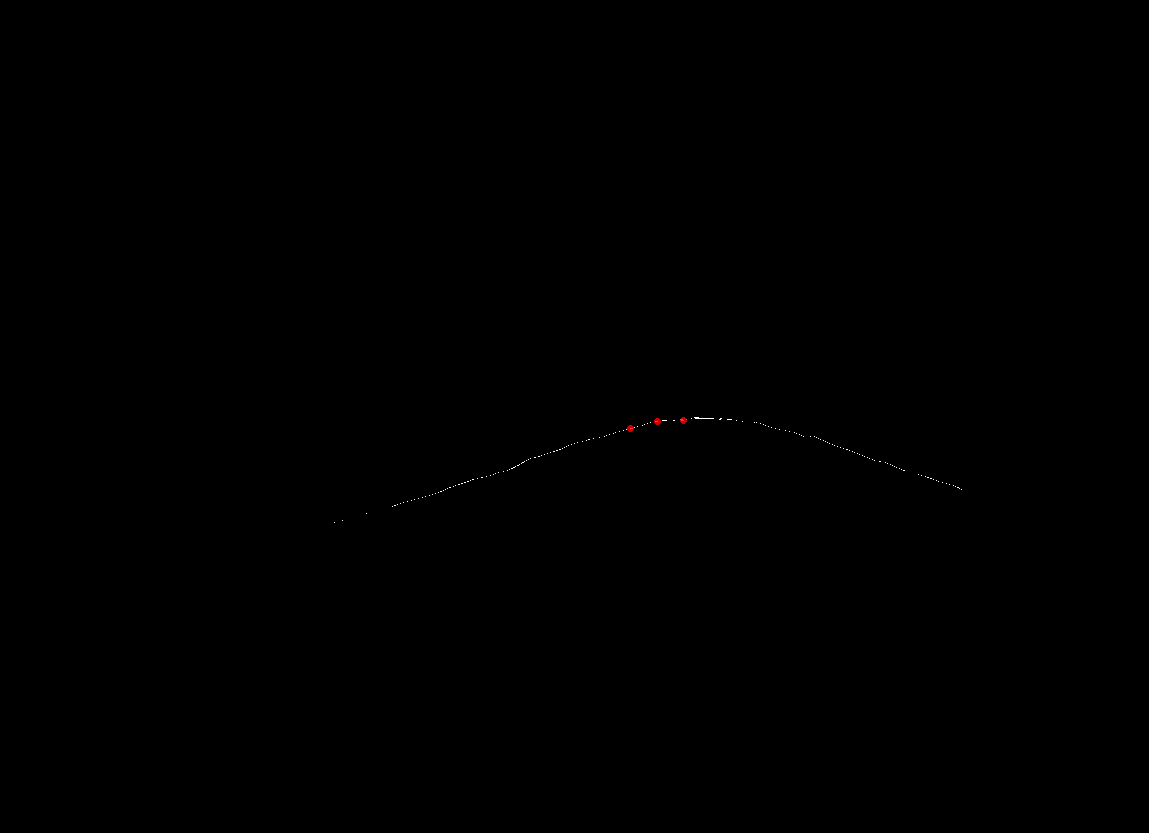

In [78]:
PIL.Image.fromarray(overlay_points(deep_ridge, [p0, p1, p2]))